# Inspecting Gender Detection Model

Here we examine the gender detection model trained in `..\detecting_gender`

In [8]:
from keras_vggface.vggface import VGGFace
from keras.utils import CustomObjectScope
import keras.backend as K
from adabound import AdaBound
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from keras_vggface import utils
import os
import glob
import cv2
from keras.optimizers import SGD, Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from imutils import paths
from sklearn.metrics import classification_report
import seaborn as sns
import skimage

In [ ]:
output_dir = '../reports/figures/'

loading training history

In [6]:
df = pd.read_hdf('../models/gender_detection/checkpoints/history.h5')

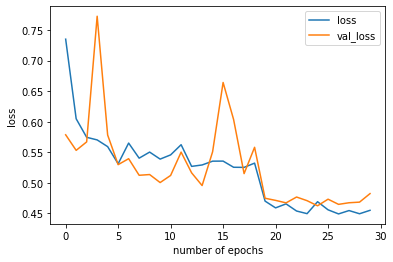

In [8]:
# Plotting Loss

plt.plot(df["loss"], label="loss")
plt.plot(df["val_loss"], label="val_loss")

plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.savefig(os.path.join(output_dir, "loss.png"))

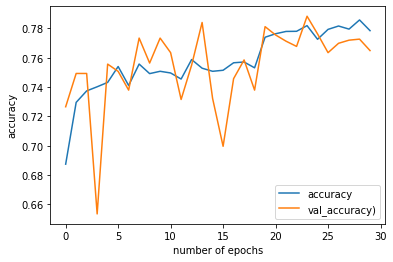

In [9]:
# Plotting Accuracy

plt.plot(df["acc"], label="accuracy")
plt.plot(df["val_acc"], label="val_accuracy)")

plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig(os.path.join(output_dir, "accuracy.png"))

## Making Predictions

In [ ]:
# here we load our customized optimizer AdaBound 
# See https://github.com/Luolc/AdaBound

lr = 1e-3

with CustomObjectScope({'AdaBound': AdaBound()}):
    model = load_model('../models/gender_detection/binary_model.h5')

In [19]:
image_size = 224
# batch_size = 64
classes = ['f','m']
img = image.load_img('../data/processed/gender/test/f/43.jpg', target_size=(image_size, image_size))

In [21]:
img = img_to_array(img)
x = np.expand_dims(img, axis=0)

In [22]:
conf = model.predict(x)
print(conf)
print(classes)

    # get label with max accuracy
idx = np.argmax(conf)
label = classes[idx]

[[0.37523565 0.6247643 ]]
['f', 'm']


In [10]:
validation_imgs = glob.glob('../data/processed/gender/test/f/*')

# imgs_f = {}
# for index, _ in enumerate(validation_imgs):
#     img = image.load_img(_, target_size=(image_size, image_size))
#     img = img_to_array(img)
#     x = np.expand_dims(img, axis=0)
#     conf = model.predict(x)
#     #if conf[0][0] < 0.6 and conf[0][0] > 0.4:
#     imgs_f[index] = conf[0][0]
        
    

In [20]:
widths = []
heights =[]
for index, _ in enumerate(validation_imgs):
    img = image.load_img(_,)
    width, height = img.size
    if width < 100:
        widths.append(width)
    if height < 100:
        heights.append(height)

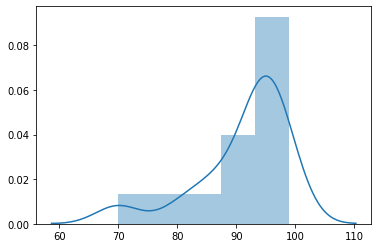

In [23]:
sns.distplot(widths)

In [60]:
validation_imgs = glob.glob('../data/processed/gender/test/m/*')

# imgs_m = {}
# for index, _ in enumerate(validation_imgs):
#     img = image.load_img(_, target_size=(image_size, image_size))
#     img = img_to_array(img)
#     x = np.expand_dims(img, axis=0)
#     conf = model.predict(x)
#     #if conf[0][0] < 0.6 and conf[0][0] > 0.4:
#     imgs_m[index] = conf[0][1]

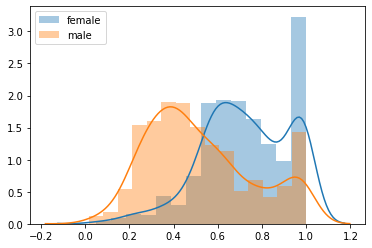

In [29]:
sns.distplot(list(imgs_f.values()), label='female')
sns.distplot(list(imgs_m.values()), label='male')
plt.legend()

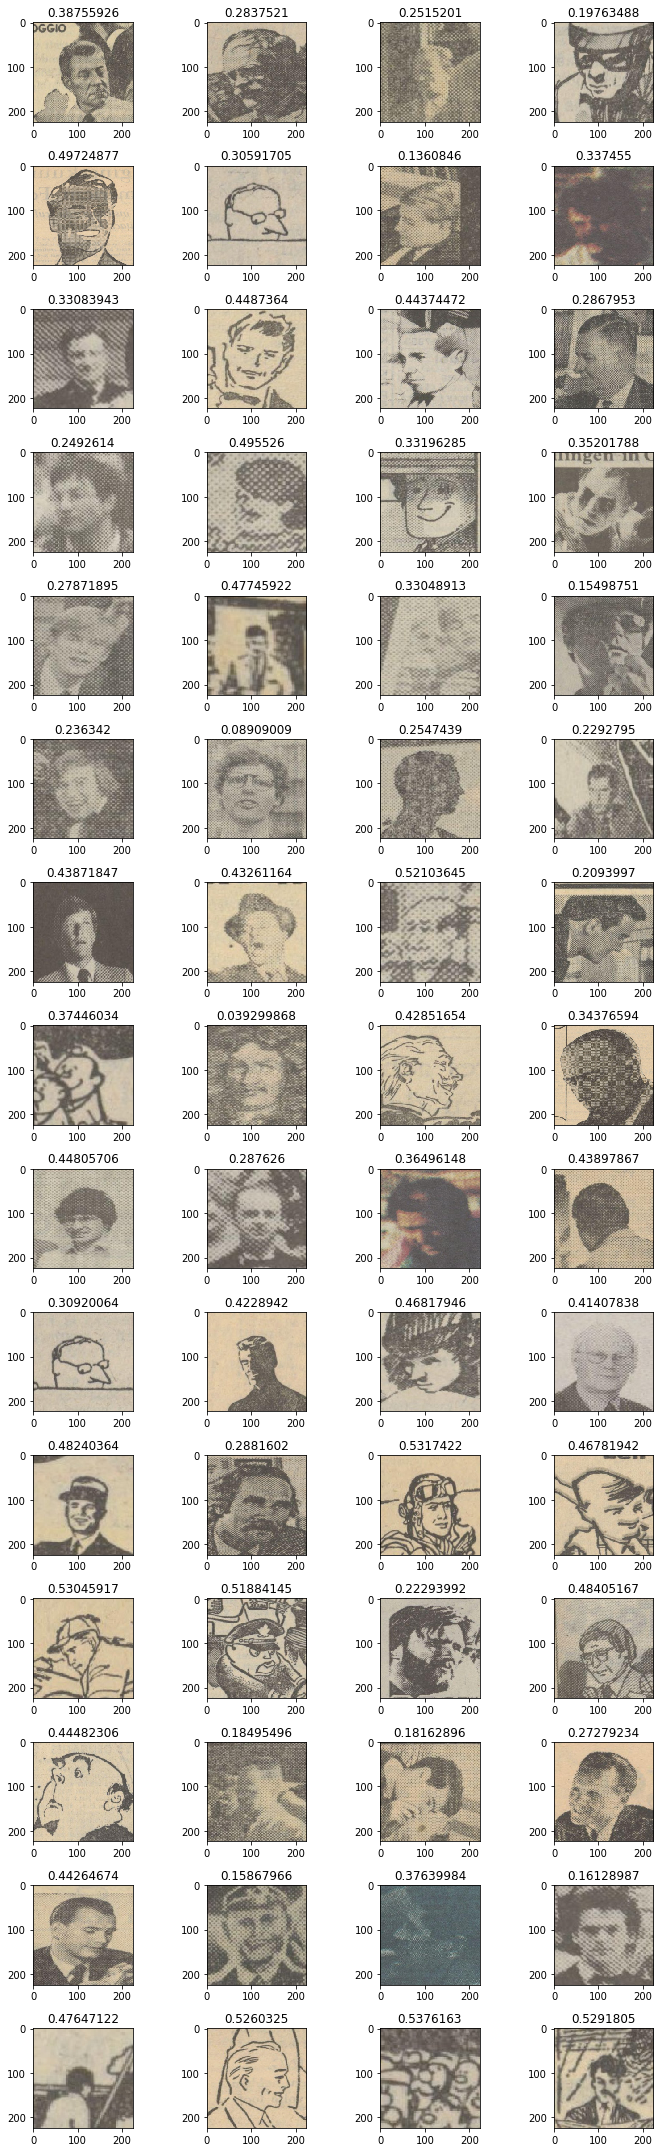

In [64]:
fig=plt.figure(figsize=(10, 30))
for i in range(0, img_num):
    fig.add_subplot(rows, cols, i+1)
    img = image.load_img(validation_imgs[list(filtered_dict.keys())[i]], target_size=(image_size, image_size))
    plt.title(list(filtered_dict.values())[i])
    plt.imshow(img)
fig.tight_layout()
    

plt.savefig('men_uncertain.png', dpi=300)
plt.show()

In [ ]:
filtered_dict_m = {k:v for k,v in imgs_m.items() if v > 0.5}
entropies_m = []
from PIL import Image
for k in filtered_dict_m.keys():
    img = image.load_img(validation_imgs[k], target_size=(image_size, image_size), color_mode = "grayscale")
    entropy = skimage.measure.shannon_entropy(img)
    entropies_m.append(entropy)

In [320]:
filtered_dict_f = {k:v for k,v in imgs_f.items() if v > 0.5}
entropies_f = []
from PIL import Image
for k in filtered_dict_f.keys():
    img = image.load_img(validation_imgs[k], target_size=(image_size, image_size), color_mode = "grayscale")
    entropy = skimage.measure.shannon_entropy(img)
    entropies_f.append(entropy)

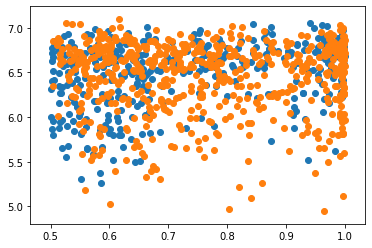

In [321]:
plt.scatter(filtered_dict_m.values(), entropies_m) 
plt.scatter(filtered_dict_f.values(), entropies_f) 


In [323]:
from scipy.stats.stats import pearsonr

In [338]:
#pearsonr(list(filtered_dict_m.values()), entropies_m)
np.corrcoef(list(filtered_dict_m.values()), entropies_m)

array([[1.        , 0.32000095],
       [0.32000095, 1.        ]])

In [301]:
img = image.load_img(validation_imgs[2], target_size=(image_size, image_size), color_mode = "grayscale")

In [307]:
entropy = skimage.measure.shannon_entropy(img)

In [308]:
entropy

6.223620888280144